<a href="https://colab.research.google.com/github/TharunSaiVT/INFO-5731/blob/main/V_T_Tharun_Sai_Assignment_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [ ]:
import re
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Sample dataset of reviews
mypath = '/content/drive/My Drive/Colab Notebooks/output_with_lemmatized_abstract.csv'
df = pd.read_csv(mypath)
print(df)

                                               abstract  \
0     We present Fashion-MNIST, a new dataset compri...   
1     TensorFlow is a machine learning system that o...   
2     TensorFlow is an interface for expressing mach...   
3     The goal of precipitation nowcasting is to pre...   
4                                                   NaN   
...                                                 ...   
9995  The image displayed in computed tomography is ...   
9996  Automatically acquiring synonymous collocation...   
9997  The past decade has seen an explosion in the a...   
9998  We have recently completed the sixth in a seri...   
9999  Face is a complex multidimensional visual mode...   

                                       cleaned_abstract  \
0     we present fashion-mnist, a new dataset compri...   
1     tensorflow is a machine learning system that o...   
2     tensorflow is an interface for expressing mach...   
3     the goal of precipitation nowcasting is to pre...

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('brown')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### 1.1 - Trigrams

In [ ]:
import itertools
import collections
from nltk.tokenize import word_tokenize

words_sentence = []
for sentence in df['lemmatized_abstract'].head(300):  # Select the first 300 rows
    if isinstance(sentence, str):  # Check if the element is a string
        words_sentence.append(word_tokenize(sentence))

# Remove empty lists
aftercleaning = [x for x in words_sentence if x != []]

# Flatten the list of lists
iterations = list(itertools.chain.from_iterable(aftercleaning))


In [ ]:
tri_grams = nltk.trigrams(iterations)
frequency_dist = nltk.FreqDist(tri_grams)
frequency_dist

FreqDist({('of', 'machine', 'learning'): 92, ('.', 'In', 'this'): 62, ('machine', 'learning', 'algorithm'): 52, ('in', 'machine', 'learning'): 48, ('.', 'Machine', 'learning'): 46, ('machine', 'learning', 'and'): 43, ('.', 'However', ','): 40, ('machine', 'learning', '.'): 37, ('machine', 'learning', 'model'): 33, ('a', 'well', 'a'): 32, ...})

### 1.2 Probability of Bi grams

In [ ]:
from collections import Counter
bi_grams = nltk.bigrams(iterations)
frequency_dist = nltk.FreqDist(bi_grams)
bi_grams_dict = dict(frequency_dist)
for word in bi_grams_dict:
  print( str(word) + ':' + str(bi_grams_dict[word] / iterations.count(word[0])))

Streaming output truncated to the last 5000 lines.
('is', 'clinically'):0.002577319587628866
('clinically', 'meaningful'):0.3333333333333333
('meaningful', '.'):0.2
('.', 'Existing'):0.0006345177664974619
('Existing', 'health'):1.0
('care', 'disparity'):0.20689655172413793
('disparity', 'should'):0.09090909090909091
('be', 'amplified'):0.005
('amplified', 'by'):1.0
('by', 'thoughtless'):0.005747126436781609
('thoughtless', 'or'):1.0
('or', 'excessive'):0.008130081300813009
('excessive', 'reliance'):0.5
('reliance', 'on'):1.0
('.', 'Static'):0.0006345177664974619
('Static', 'classification'):1.0
('classification', 'ha'):0.018867924528301886
('the', 'predominant'):0.0006561679790026247
('predominant', 'focus'):1.0
('focus', 'of'):0.034482758620689655
('the', 'study'):0.0006561679790026247
('While', 'most'):0.1
('most', 'model'):0.024390243902439025
('model', 'do'):0.003257328990228013
('not', 'consider'):0.012345679012345678
('consider', 'how'):0.1
('how', 'decision'):0.01282051282051282

### 1.3 Noun Phrases and relative probabilities of each review in terms of other reviews

In [ ]:
import numpy as np  # Import numpy for NaN handling

whole_dataset = ''
index = []
i = 1
for line in df['lemmatized_abstract'].head(100):  # Select the first 1000 rows
    if isinstance(line, str):
        whole_dataset += line
        value = 'Review-' + str(i)
        index.append(value)
        i += 1
    elif isinstance(line, float) and np.isnan(line):  # Check for NaN
        index.append('Review-' + str(i) + " (NaN)")
        i += 1

In [ ]:
import pandas as pd
from textblob import TextBlob

# Assuming df is your DataFrame containing the lemmatized abstracts
# and whole_dataset is the concatenated string of all abstracts

noun_phrases = []
frequency = []
for line in df['lemmatized_abstract'].head(100):
    if isinstance(line, str):
        blob = TextBlob(line)
        for noun in blob.noun_phrases:
            noun_phrases.append(noun)

for word in noun_phrases:
    noun_phrases_freq = []
    word_count_whole_dataset = whole_dataset.count(word)
    for line in df['lemmatized_abstract'].head(100):
        if isinstance(line, str):
            word_count_line = line.count(word)
            if word_count_whole_dataset != 0:
                noun_phrases_freq.append(word_count_line / word_count_whole_dataset)
            else:
                noun_phrases_freq.append(0)  # Set frequency to 0 if count is zero in whole_dataset
        else:
            noun_phrases_freq.append(0)  # If line is not a string, set frequency to 0
    frequency.append(noun_phrases_freq)

noun_phrases_df = pd.DataFrame(frequency).T
noun_phrases_df.columns = list(noun_phrases)
noun_phrases_df.index = df.index[:100]  # Assuming you want to use the first 100 indices
noun_phrases_df

,fashion-mnist,new dataset,grayscale image,fashion product,fashion-mnist,direct drop-in replacement,mnist,machine learning algorithm,image size,data format,...,water management,soil management,machine learning technology,machine learning,sensor data,farm management system,real time,artificial intelligence,rich recommendation,farmer decision support
0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.1,1.0,1.0,...,0.0,0.0,0.0,0.007812,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.015625,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,...,0.0,0.0,0.0,0.015625,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.007812,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,...,0.0,0.0,0.0,0.023438,0.0,0.0,0.0,0.000000,0.0,0.0
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.007812,0.0,0.0,0.0,0.000000,0.0,0.0


## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

### 2.1 - TF-IDF

In [ ]:
import pandas as pd
import math

def tf_idf_value(sentence, word):
    size = len(sentence.split(" "))
    tf_value = sentence.count(word) / size
    idf_value = 0
    if tf_value != 0:
        idf_value = math.log(size) / sentence.count(word)
    else:
        return 0
    return tf_value * idf_value

# Assuming df is a DataFrame containing a column named 'lemmatized_abstract'
# containing preprocessed text
# Assuming 'df' is defined properly before this code snippet
# Filter out NaN values
df = df.dropna(subset=['lemmatized_abstract'])

# Get the first 100 sentences
sentences = df['lemmatized_abstract'].head(100).values.tolist()
tokens_list = set([j for i in sentences for j in str(i).split(" ")])  # Convert to string before splitting
tf_idf = pd.DataFrame(tokens_list, columns=["token"])
count = 0
for i in sentences:
    tf_idf[str(count)] = tf_idf["token"].apply(lambda x: tf_idf_value(str(i), x))  # Convert to string before passing to function
    count += 1

tf_idf


,token,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
0,wonder,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.043353,0.0,0.0,0.0
1,English-to-French,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
2,any,0.000000,0.027853,0.0,0.0,0.038383,0.021661,0.031562,0.0,0.022158,...,0.025462,0.0,0.020798,0.0,0.0,0.020798,0.000000,0.0,0.0,0.0
3,layman,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
4,benchmarking,0.050434,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3210,Naive,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
3211,viewpoint,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
3212,programming,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
3213,featurization,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0


### 2.2 - Ranking using Cosine Similarity

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
query_sentence = 'The goal of precipitation nowcasting is to predict the future rainfall intensity in a local region over a relatively short period of time . Very few previous study have examined this crucial and challenging weather forecasting problem from the machine learning perspective . In this paper , we formulate precipitation nowcasting a a spatiotemporal sequence forecasting problem in which both the input and the prediction target are spatiotemporal sequence . By extending the fully connected LSTM ( FC-LSTM ) to have convolutional structure in both the input-to-state and state-to-state transition , we propose the convolutional LSTM ( ConvLSTM ) and use it to build an end-to-end trainable model for the precipitation nowcasting problem . Experiments show that our ConvLSTM network capture spatiotemporal correlation better and consistently outperforms FC-LSTM and the state-of-the-art operational ROVER algorithm for precipitation nowcasting .'
X_list = word_tokenize(query_sentence)
sw = stopwords.words('english')
X_set = {w for w in X_list if not w in sw}

In [ ]:
def compute_vector(X_set, Y_set):
  rvector = X_set.union(Y_set)
  l1 =[];l2 =[]
  for w in rvector:
      if w in X_set: l1.append(1)
      else: l1.append(0)
      if w in Y_set: l2.append(1)
      else: l2.append(0)
  return rvector, l1, l2

In [ ]:

def compute_cosine(rvector, l1, l2):
  c = 0
  for i in range(len(rvector)):
        c+= l1[i]*l2[i]
  cosine = c / float((sum(l1)*sum(l2))**0.5)
  return cosine

In [ ]:
similarity_list = []
for sentence in df['lemmatized_abstract'].head(100):
  Y_list = word_tokenize(sentence)
  Y_set = {w for w in Y_list if not w in sw}
  rvector, l1, l2 = compute_vector(X_set, Y_set)
  try:
    similarity = compute_cosine(rvector, l1, l2)
  except ZeroDivisionError:
    similarity = 'None'
  similarity_list.append(similarity)
cosine_dataframe = pd.DataFrame(list(zip(df['lemmatized_abstract'].head(100),similarity_list)), columns=['Abstract','Cosine Similarity'])
cosine_dataframe

,Abstract,Cosine Similarity
0,"We present Fashion-MNIST , a new dataset compr...",0.123821
1,TensorFlow is a machine learning system that o...,0.160899
2,TensorFlow is an interface for expressing mach...,0.118380
3,The goal of precipitation nowcasting is to pre...,1.000000
4,Machine learning address the question of how t...,0.103707
...,...,...
95,"Networks play important role in modern life , ...",0.141572
96,Climate change is one of the greatest challeng...,0.108687
97,Explainable machine learning offer the potenti...,0.112777
98,The demand for artificial intelligence ha grow...,0.150899


## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [ ]:
# Write your code here

from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import ast

In [ ]:
mypath = '/content/drive/My Drive/Colab Notebooks/output_with_lemmatized_abstract.csv'
df_new = pd.read_csv(mypath)
df_new

,abstract,cleaned_abstract,abstract_without_stopwords,stemmed_abstract,lemmatized_abstract
0,"We present Fashion-MNIST, a new dataset compri...","we present fashion-mnist, a new dataset compri...","present Fashion-MNIST, new dataset comprising ...","we present fashion-mnist , a new dataset compr...","We present Fashion-MNIST , a new dataset compr..."
1,TensorFlow is a machine learning system that o...,tensorflow is a machine learning system that o...,TensorFlow machine learning system operates la...,tensorflow is a machin learn system that oper ...,TensorFlow is a machine learning system that o...
2,TensorFlow is an interface for expressing mach...,tensorflow is an interface for expressing mach...,TensorFlow interface expressing machine learni...,tensorflow is an interfac for express machin l...,TensorFlow is an interface for expressing mach...
3,The goal of precipitation nowcasting is to pre...,the goal of precipitation nowcasting is to pre...,goal precipitation nowcasting predict future r...,the goal of precipit nowcast is to predict the...,The goal of precipitation nowcasting is to pre...
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
9995,The image displayed in computed tomography is ...,the image displayed in computed tomography is ...,image displayed computed tomography scaled rep...,the imag display in comput tomographi is a sca...,The image displayed in computed tomography is ...
9996,Automatically acquiring synonymous collocation...,automatically acquiring synonymous collocation...,Automatically acquiring synonymous collocation...,automat acquir synonym colloc pair such as and...,Automatically acquiring synonymous collocation...
9997,The past decade has seen an explosion in the a...,the past decade has seen an explosion in the a...,past decade seen explosion amount digital info...,the past decad ha seen an explos in the amount...,The past decade ha seen an explosion in the am...
9998,We have recently completed the sixth in a seri...,we have recently completed the sixth in a seri...,"recently completed sixth series ""Message Under...",we have recent complet the sixth in a seri of ...,We have recently completed the sixth in a seri...


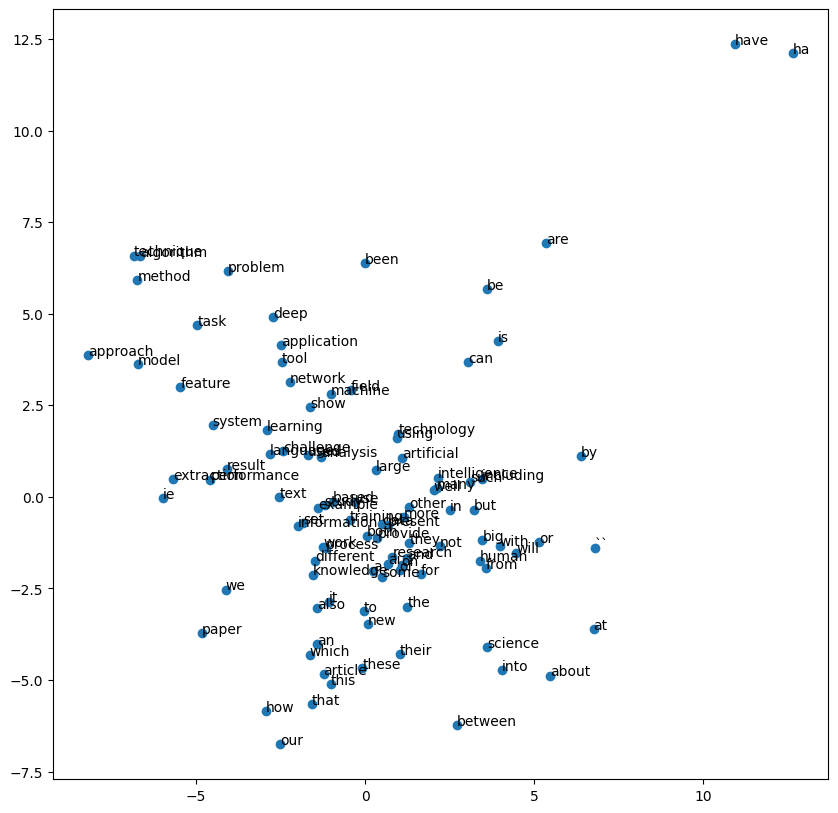

In [ ]:
# Write your code here
!pip install gensim matplotlib scikit-learn

from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import ast

import nltk
from nltk.tokenize import word_tokenize
import string

# Tokenize and preprocess the text data
def preprocess_text(text):
    # Tokenize text
    tokens = word_tokenize(text)
    # Convert tokens to lowercase
    tokens = [token.lower() for token in tokens]
    # Remove punctuation
    tokens = [token for token in tokens if token not in string.punctuation]
    return tokens

# Tokenize and preprocess all texts in the DataFrame
tokenized_texts = df['lemmatized_abstract'].dropna().apply(preprocess_text)

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_texts, vector_size=300, window=5, min_count=1, workers=4)

# Function to visualize embeddings
def visualize_embeddings(model, words=None, sample=100):
    if words is None:
        words = model.wv.index_to_key[:sample]

    word_vectors = model.wv[words]

    pca = PCA(n_components=2)
    result = pca.fit_transform(word_vectors)

    plt.figure(figsize=(10, 10))
    plt.scatter(result[:, 0], result[:, 1])
    for i, word in enumerate(words):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))

    plt.show()

# Visualize embeddings
visualize_embeddings(word2vec_model)

## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [ ]:
Link : https://github.com/TharunSaiVT/INFO-5731/blob/main/sentiment_analysis_results%20(1).csv

SyntaxError: invalid syntax (<ipython-input-117-d8dbf698c085>, line 1)

# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [ ]:
# Type your answer

As the abstracts we used are long and lengthy. It took more time for us and the system is getting crashed
due to whole usage of the ram. I enjoyed whole assignment. It was good and sufficient.